# Tweets Language Detection

In this notebook, we use the langdetect 1.0.7 "Language detection library ported from Google's language-detection." to detect the language of each tweet we have in switzerland..
  
Before applying the language detection we cleaned the tweet's text by removing urls, mentions, hashtags, and numbers!

later we analyse tweets language distribution in switzerland and we observe that the top 9 languages used are:
French, English, German, Italian, Spanish, portugees, Trkish, Arabic, and Dutch!

also we did some analysis on the distribution of languages, considering only 4 languages (English, French, German, and Italian)  for some cantons(see below)!


In [1]:
from langdetect import detect
import pandas as pd
import re

In [2]:
import sys
sys.stdout = open('/dev/stdout', 'w')

In [4]:
tweets=pd.read_csv('canton_mapping_swiss_tweets.csv')

In [5]:
tweets.head()

,id,userId,createdAt,text,longitude,latitude,placeId,inReplyTo,source,truncated,...,sourceName,sourceUrl,userName,screenName,followersCount,friendsCount,statusesCount,userLocation,swiss,canton
0,9.514846e+09,7198282.0,2010-02-23 06:22:40,Still the best coffee in town — at La Stanza h...,8.53781,47.3678,N,N,550.0,NaN,...,Gowalla,http://gowalla.com/,Nico Luchsinger,halbluchs,1820.0,703.0,4687.0,"Zurich, Switzerland",yes,ZH
1,9.516574e+09,14657884.0,2010-02-23 07:34:25,It has been a week or so.. and today I just co...,6.13396,46.1951,N,N,3.0,NaN,...,foursquare,http://foursquare.com,Javier Belmonte,vichango,167.0,277.0,2885.0,"Geneva, Switzerland",yes,GE
2,9.516953e+09,14703863.0,2010-02-23 07:51:47,Getting ready.. http://twitpic.com/14v8gz,8.81749,47.2288,N,N,62.0,NaN,...,Twittelator,http://stone.com/Twittelator,Urs,ugro,75.0,161.0,1390.0,"Zürich, Switzerland",yes,SG
3,9.517199e+09,14393717.0,2010-02-23 08:02:57,Un peu de réconfort liquide en take away après...,6.63254,46.5199,N,N,3.0,NaN,...,foursquare,http://foursquare.com,Romain P.,PIMboula,135.0,109.0,2381.0,"Lausanne, Suisse",yes,VD
4,9.517917e+09,13535402.0,2010-02-23 08:35:39,I'm at Online PC Magazin in Adliswil http://go...,8.53010,47.3152,N,N,550.0,NaN,...,Gowalla,http://gowalla.com/,Patrick Hediger,hediger,1511.0,682.0,12157.0,"Zurich, Switzerland",yes,ZH


In [6]:
text_list=tweets['text'].tolist()

In [7]:
#clean tweets text
i=0
c=0
language_list=[]
pattern = re.compile('([^\s\w]|_)+')
for text in text_list:
    t = re.sub(r"http\S+", "", text) #remove urls
    t=''.join([i for i in t if not i.isdigit()])# remove numbers
    t=" ".join(filter(lambda x:x[0]!='@', t.split()))
    t=t.replace("I'm","I am")
    t=t.replace("i'm","i am")
    t = pattern.sub('', t)
    if((t!='') & (t!=' ')):
        try:
            if((t.startswith("I am at"))|(t.startswith("i am at"))):
                lan='en'
            else:   
                lan=detect(t)
            language_list.append(lan)
        except:
            lan='none'
            language_list.append(lan)
            continue
        #print(i)
        i+=1
    else:
        language_list.append('none')
        i+=1
    if(i==5000):
        c+=5000
        i=0
        print(c)

        

In [8]:
tweets['language']=language_list

In [9]:
tweets.head()

,id,userId,createdAt,text,longitude,latitude,placeId,inReplyTo,source,truncated,...,sourceUrl,userName,screenName,followersCount,friendsCount,statusesCount,userLocation,swiss,canton,language
0,9.514846e+09,7198282.0,2010-02-23 06:22:40,Still the best coffee in town — at La Stanza h...,8.53781,47.3678,N,N,550.0,NaN,...,http://gowalla.com/,Nico Luchsinger,halbluchs,1820.0,703.0,4687.0,"Zurich, Switzerland",yes,ZH,en
1,9.516574e+09,14657884.0,2010-02-23 07:34:25,It has been a week or so.. and today I just co...,6.13396,46.1951,N,N,3.0,NaN,...,http://foursquare.com,Javier Belmonte,vichango,167.0,277.0,2885.0,"Geneva, Switzerland",yes,GE,en
2,9.516953e+09,14703863.0,2010-02-23 07:51:47,Getting ready.. http://twitpic.com/14v8gz,8.81749,47.2288,N,N,62.0,NaN,...,http://stone.com/Twittelator,Urs,ugro,75.0,161.0,1390.0,"Zürich, Switzerland",yes,SG,en
3,9.517199e+09,14393717.0,2010-02-23 08:02:57,Un peu de réconfort liquide en take away après...,6.63254,46.5199,N,N,3.0,NaN,...,http://foursquare.com,Romain P.,PIMboula,135.0,109.0,2381.0,"Lausanne, Suisse",yes,VD,fr
4,9.517917e+09,13535402.0,2010-02-23 08:35:39,I'm at Online PC Magazin in Adliswil http://go...,8.53010,47.3152,N,N,550.0,NaN,...,http://gowalla.com/,Patrick Hediger,hediger,1511.0,682.0,12157.0,"Zurich, Switzerland",yes,ZH,en


In [43]:
tweets=pd.read_csv('tweets_with_canton_language_short.csv')

In [24]:
tweets=tweets[tweets['language']!='none']

In [45]:
len(tweets)

12579034

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


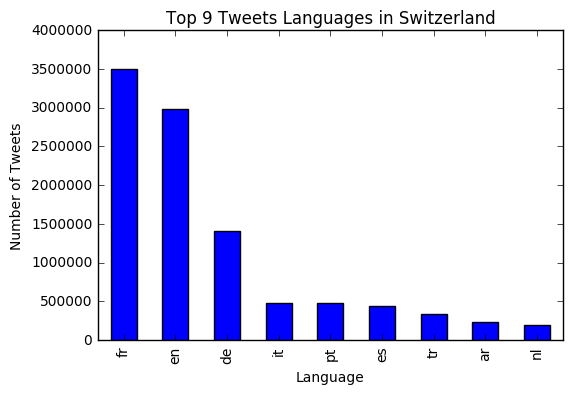

In [29]:
#language distribution
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

bb=pd.DataFrame()
bb=tweets.groupby('language').size()
bb=bb.reset_index()
bb=bb.sort(0, ascending=False)
bb=bb.set_index('language')
bb.head(9)[0].plot(kind='bar')
plt.title('Top 9 Tweets Languages in Switzerland')
plt.ylabel('Number of Tweets')
plt.xlabel('Language')


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


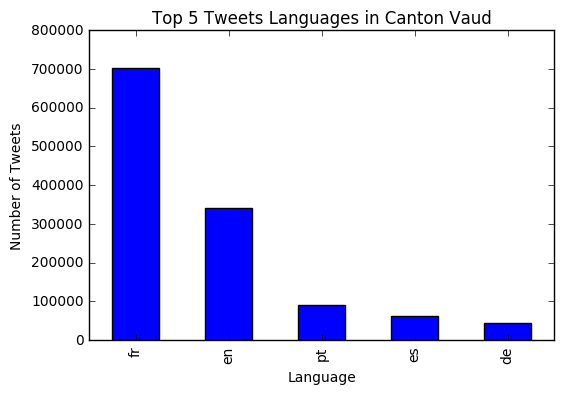

In [37]:
VD=tweets[tweets['canton']=='VD']
bb=pd.DataFrame()
bb=VD.groupby('language').size()
bb=bb.reset_index()
bb=bb.sort(0, ascending=False)
bb=bb.set_index('language')
bb.head(5)[0].plot(kind='bar')

plt.title('Top 5 Tweets Languages in Canton Vaud')
plt.ylabel('Number of Tweets')
plt.xlabel('Language')


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


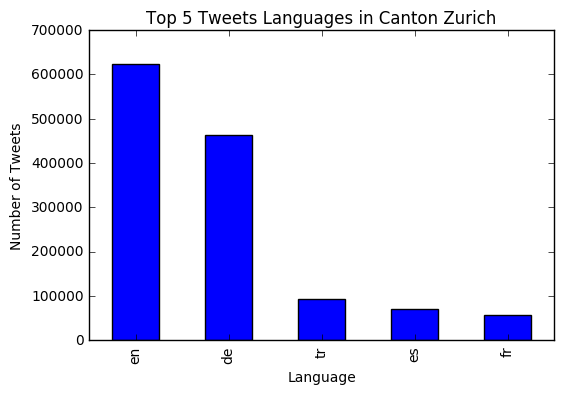

In [38]:
ZH=tweets[tweets['canton']=='ZH']
bb=pd.DataFrame()
bb=ZH.groupby('language').size()
bb=bb.reset_index()
bb=bb.sort(0, ascending=False)
bb=bb.set_index('language')
bb.head(5)[0].plot(kind='bar')

plt.title('Top 5 Tweets Languages in Canton Zurich')
plt.ylabel('Number of Tweets')
plt.xlabel('Language')


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


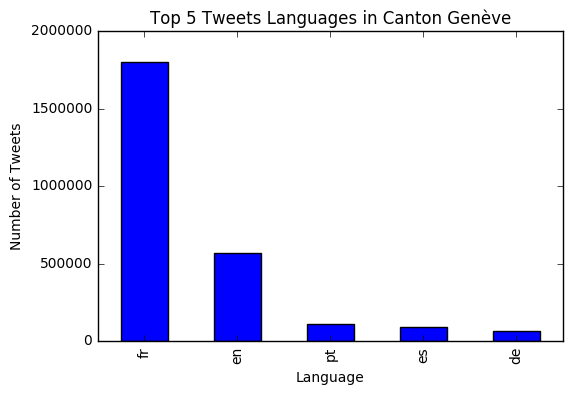

In [40]:
GE=tweets[tweets['canton']=='GE']
bb=pd.DataFrame()
bb=GE.groupby('language').size()
bb=bb.reset_index()
bb=bb.sort(0, ascending=False)
bb=bb.set_index('language')
bb.head(5)[0].plot(kind='bar')

plt.title('Top 5 Tweets Languages in Canton Genève')
plt.ylabel('Number of Tweets')
plt.xlabel('Language')


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


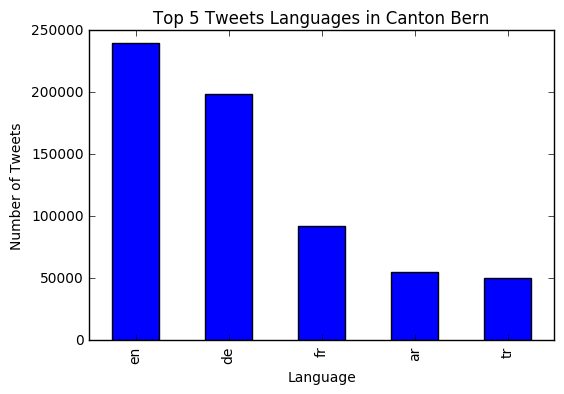

In [41]:
BE=tweets[tweets['canton']=='BE']
bb=pd.DataFrame()
bb=BE.groupby('language').size()
bb=bb.reset_index()
bb=bb.sort(0, ascending=False)
bb=bb.set_index('language')
bb.head(5)[0].plot(kind='bar')

plt.title('Top 5 Tweets Languages in Canton Bern')
plt.ylabel('Number of Tweets')
plt.xlabel('Language')


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


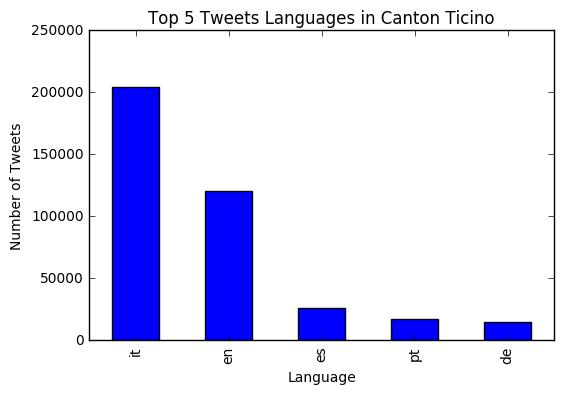

In [42]:
TI=tweets[tweets['canton']=='TI']
bb=pd.DataFrame()
bb=TI.groupby('language').size()
bb=bb.reset_index()
bb=bb.sort(0, ascending=False)
bb=bb.set_index('language')
bb.head(5)[0].plot(kind='bar')

plt.title('Top 5 Tweets Languages in Canton Ticino')
plt.ylabel('Number of Tweets')
plt.xlabel('Language')


In [21]:
df=pd.read('language_tweets.csv')

In [23]:
canton_list=df.canton.unique().tolist()


In [25]:
english=[]
french=[]
german=[]
italian=[]
for canton in canton_list:
    aa=df[df['canton']==canton]
    bb=aa.groupby('language').size()
    bb=bb.reset_index()
    bb=bb.sort(0, ascending=False)
    bb=bb.set_index('language')
    english.append(bb.loc['en'][0])
    french.append(bb.loc['fr'][0])
    german.append(bb.loc['de'][0])
    italian.append(bb.loc['it'][0])



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [28]:
to_be_normalized=[]
i=0
for can in canton_list:
    a=[]
    a.append(english[i])
    a.append(french[i])
    a.append(german[i])
    a.append(italian[i])
    to_be_normalized.append(a)
    i+=1
normalized=[]
for s in to_be_normalized:
    f = [float(i)/sum(s) for i in s]
    normalized.append(f)



In [29]:
english=[]
french=[]
german=[]
italian=[]

for n in normalized:
    english.append(n[0])
    french.append(n[1])
    german.append(n[2])
    italian.append(n[3])

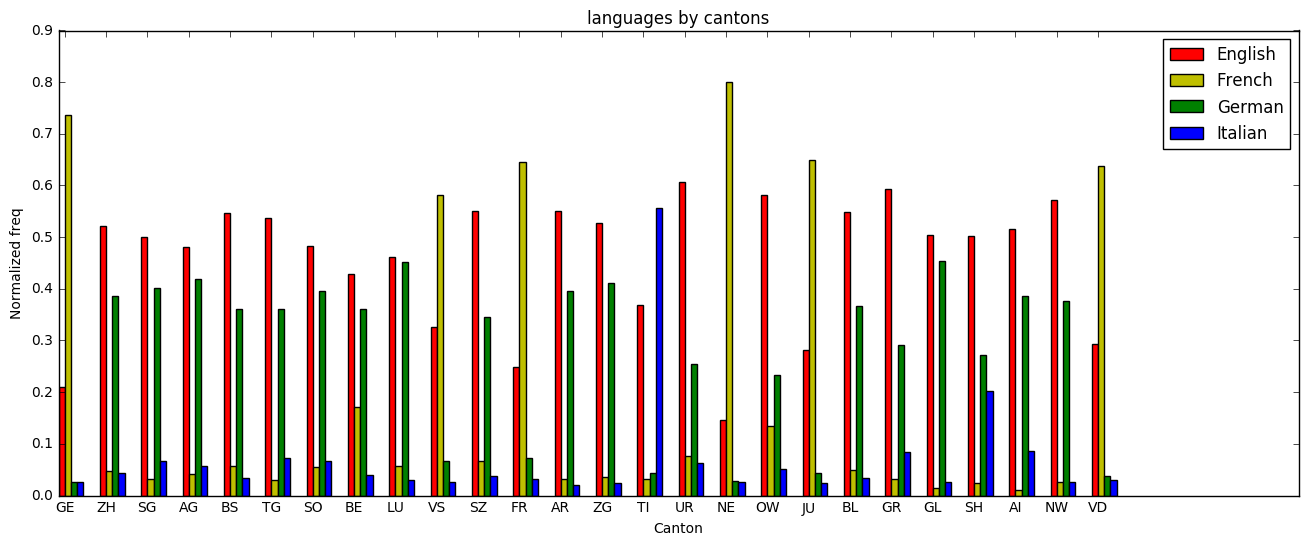

In [33]:
import numpy as np
import matplotlib.pyplot as plt

N = 26


ind = np.arange(N)  
width = 0.15

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, english, width, color='r')


rects2 = ax.bar(ind+width, french, width, color='y')



rects3 = ax.bar(ind+width+width, german, width, color='g')

rects4 = ax.bar(ind+width+width+width, italian, width, color='b')

ax.set_ylabel('Normalized freq')
ax.set_xlabel('Canton')
ax.set_title('languages by cantons')
ax.set_xticks(ind+width)
ax.set_xticklabels(canton_list)

ax.legend( (rects1[0], rects2[0],rects3[0], rects4[0]), ('English', 'French','German','Italian') )

plt.show()